In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [13]:
train=pd.read_csv("../input/newtrain_w2v_t512.txt",header=None)
train.columns=['ID','topic','cnt']
train = pd.pivot_table(train, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
train.shape

(3315, 513)

In [14]:
test=pd.read_csv("../input/newtest_w2v_t512.txt",header=None)
test.columns=['ID','topic','cnt']
test = pd.pivot_table(test, values='cnt', index=['ID'],
               columns=['topic'], aggfunc=np.sum)
test.shape

(5667, 513)

In [15]:
(test.columns==train.columns).all()

True

In [16]:
joined=pd.concat([train,test])
joined.shape

(8982, 513)

In [17]:
idf=np.log(1/(joined>0).mean())

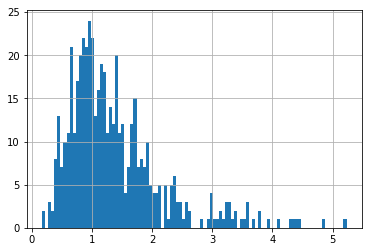

topic
 385    0.168128
 384    0.197941
 248    0.306639
-1      0.311948
 161    0.318509
 60     0.325422
 240    0.367774
 153    0.374552
 245    0.374876
 155    0.380561
 417    0.383497
 170    0.396819
 412    0.401964
 416    0.407638
 408    0.419592
 491    0.423666
 490    0.429294
 157    0.432549
 81     0.443244
 400    0.444285
 241    0.446893
 171    0.448809
 166    0.455283
 179    0.459152
 185    0.460386
 62     0.461269
 61     0.461269
 370    0.465161
 392    0.476034
 389    0.481605
          ...   
 195    3.011668
 59     3.081955
 458    3.111513
 460    3.154943
 461    3.197616
 319    3.208575
 58     3.214100
 122    3.250775
 462    3.262336
 111    3.271095
 120    3.294835
 348    3.316080
 123    3.359975
 349    3.389245
 28     3.478960
 311    3.557800
 112    3.565644
 45     3.585525
 350    3.593590
 121    3.664899
 30     3.775102
 29     3.789772
 351    3.961314
 125    4.092343
 118    4.298957
 144    4.323854
 31     4.384479
 119    

In [18]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [19]:
train_tfidf=train*idf

In [20]:
train_tfidf[train_tfidf==0]=np.nan
train_tfidf.columns=['t512_'+str(u) for u in train_tfidf.columns]

In [21]:
train_tfidf.to_csv("../input/newtrain_topic512_tfidf.csv")

In [22]:
train_tfidf.shape

(3315, 513)

In [23]:
test_tfidf=test*idf

In [24]:
test_tfidf[test_tfidf==0]=np.nan
test_tfidf.columns=['t128_'+str(u) for u in test_tfidf.columns]

In [25]:
test_tfidf.to_csv("../input/newtest_topic512_tfidf.csv")

In [26]:
test_tfidf.shape

(5667, 513)

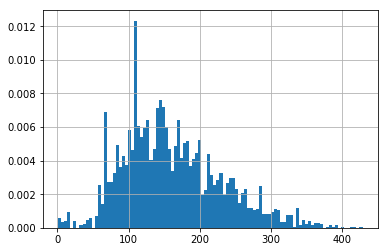

In [27]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

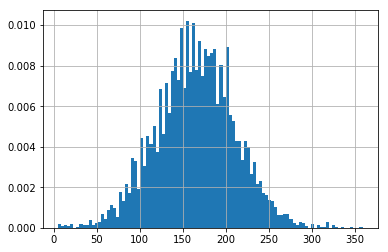

In [28]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)